<a href="https://colab.research.google.com/github/rahulvenkat207/CBoWModel/blob/main/Cbowmulti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the vocabulary
vocabulary = ['I', 'want', 'to', 'eat', 'apple', 'orange', 'sapota', 'banana']

# Define the given one-hot encoded vectors
one_hot_encoded = np.eye(len(vocabulary))

np.random.seed(0)  # for reproducibility
weights_input_hidden = np.random.rand(len(vocabulary), 3)  # Assuming 3 hidden units

# Define the weights for hidden to output layer
weights_hidden_output = np.random.rand(3, len(vocabulary))  # Adjusted to match dimensions




In [ ]:
def softmax(x):
    if x.ndim == 1:
        exp_x = np.exp(x - np.max(x))
        return exp_x / np.sum(exp_x)
    elif x.ndim == 2:
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)
    else:
        raise ValueError("Input array must be 1D or 2D.")


In [ ]:
# Custom loss function
def custom_loss(output_layer, target_index):
    predicted_probability = output_layer[target_index]
    loss = -np.log(predicted_probability + 1e-9)  # Adding a small value to avoid division by zero
    return loss


In [ ]:
def compute_error_and_update_weights(context_word_vectors, target_index, weights_input_hidden, weights_hidden_output,
                                      learning_rate):
    # Compute hidden layer
    average_vector = np.mean(context_word_vectors, axis=0)
    hidden_layer = np.dot(average_vector, weights_input_hidden)

    # Compute output layer
    output_layer = np.dot(hidden_layer, weights_hidden_output)

    # Compute softmax predictions
    softmax_predictions = softmax(output_layer)

    # Compute error
    error = softmax_predictions - np.eye(weights_hidden_output.shape[1])[target_index]

    # Update weights_hidden_output
    weights_hidden_output -= learning_rate * np.outer(hidden_layer.flatten(), error.flatten())

    # Backpropagate through hidden layer
    hidden_error = np.dot(error, weights_hidden_output.T)
    hidden_gradient = np.outer(average_vector.flatten(), hidden_error)
    weights_input_hidden -= learning_rate * hidden_gradient

    return softmax_predictions, error





Word      Prediction     Error     
p(I|I want to eat) 0.0026132977661803957 0.0026132977661803957
p(want|I want to eat) 0.002991770618569147 0.002991770618569147
p(to|I want to eat) 0.0024398853455814876 0.0024398853455814876
p(eat|I want to eat) 0.002927477914959725 0.002927477914959725
p(apple|I want to eat) 0.2471229526573069 0.2471229526573069
p(orange|I want to eat) 0.24736113230132817 0.24736113230132817
p(sapota|I want to eat) 0.24692982840119354 -0.7530701715988064
p(banana|I want to eat) 0.2476136549948806 0.2476136549948806
Weights from Input to Hidden Layer:
Word I: [0.83752295 1.39846221 1.05338608]
Word want: [0.83359262 1.10692765 1.09651682]
Word to: [0.72629665 1.57504585 1.41428546]
Word eat: [0.67215096 1.47499788 0.97951762]
Word apple: [0.56804456 0.92559664 0.07103606]
Word orange: [0.0871293  0.0202184  0.83261985]
Word sapota: [0.77815675 0.87001215 0.97861834]
Word banana: [0.79915856 0.46147936 0.78052918]

Weights from Hidden to Output Layer:
Word        eat 

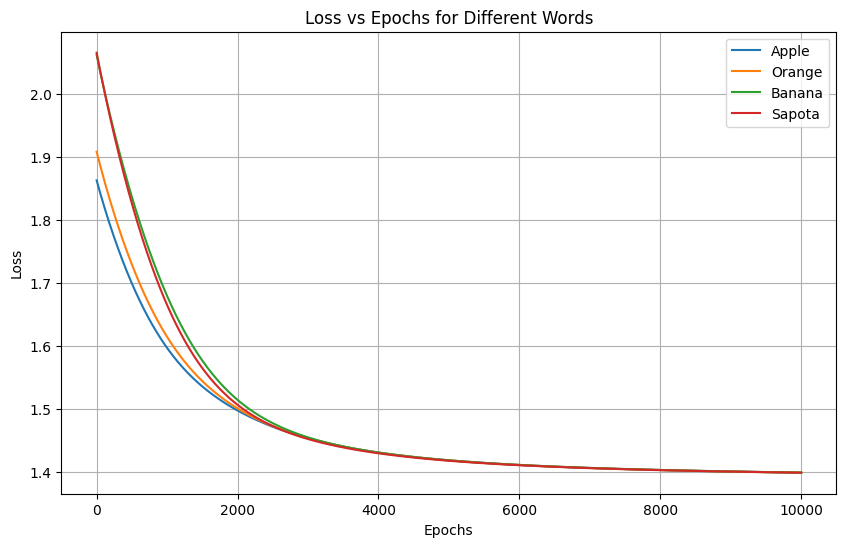

Loss list for all fruits:
Apple: [1.8624346378247432, 1.862026401841342, 1.8616185817974202, 1.8612111768106, 1.8608041860025581, 1.860397608499008, 1.8599914434296838, 1.8595856899283214, 1.8591803471326418, 1.8587754141843333, 1.8583708902290348, 1.8579667744163177, 1.8575630658996698, 1.8571597638364783, 1.8567568673880108, 1.856354375719401, 1.8559522879996304, 1.8555506034015121, 1.8551493211016732, 1.854748440280539, 1.8543479601223165, 1.8539478798149769, 1.8535481985502404, 1.8531489155235588, 1.852750029934099, 1.852351540984729, 1.8519534478819983, 1.851555749836124, 1.8511584460609742, 1.8507615357740517, 1.8503650181964797, 1.8499688925529822, 1.8495731580718728, 1.8491778139850354, 1.8487828595279103, 1.848388293939478, 1.8479941164622433, 1.847600326342221, 1.8472069228289187, 1.8468139051753234, 1.8464212726378841, 1.846029024476498, 1.845637159954495, 1.845245678338622, 1.844854578899029, 1.8444638609092527, 1.844073523646202, 1.8436835663901436, 1.8432939884246868, 1.8

In [ ]:
# Define learning rate
learning_rate = 0.001

# Define the training dataset (corpus) with the context "I want to eat"
training_data = [
    (['I', 'want', 'to', 'eat'], 'apple'),
    (['I', 'want', 'to', 'eat'], 'orange'),
    (['I', 'want', 'to', 'eat'], 'banana'),
    (['I', 'want', 'to', 'eat'], 'sapota')
] * 1

# Define the number of epochs
num_epochs = 10000

# Initialize lists to store losses for each word
apple_loss_list = []
orange_loss_list = []
banana_loss_list = []
sapota_loss_list = []

# Iterate over the training dataset
for epoch in range(num_epochs):
    for context_words, target_word in training_data:
        context_indices = [vocabulary.index(word) for word in context_words]
        target_index = vocabulary.index(target_word)
        context_word_vectors = [one_hot_encoded[idx] for idx in context_indices]

        # Compute predictions, error, and update weights
        predictions, error = compute_error_and_update_weights(context_word_vectors, target_index, weights_input_hidden,
                                                              weights_hidden_output, learning_rate)

        # Compute custom loss for each word
        if target_word == 'apple':
            apple_loss_list.append(custom_loss(predictions, target_index))
        elif target_word == 'orange':
            orange_loss_list.append(custom_loss(predictions, target_index))
        elif target_word == 'banana':
            banana_loss_list.append(custom_loss(predictions, target_index))
        elif target_word == 'sapota':
            sapota_loss_list.append(custom_loss(predictions, target_index))



# Print the final prediction and error
print(f"{'Word':<10}{'Prediction':<15}{'Error':<10}")
for word, target_index in zip(vocabulary, range(len(vocabulary))):
    print(f"p({word}|{' '.join(training_data[0][0])}) {predictions[target_index]:<15} {error[target_index]:<10}")

# Print the learned weights from input to hidden layer
print("Weights from Input to Hidden Layer:")
for i, embedding_vector in enumerate(weights_input_hidden):
    print(f"Word {vocabulary[i]}: {embedding_vector}")

print("\nWeights from Hidden to Output Layer:")
print(f"{'Word':<12}{'eat':<15}{'apple':<10}{'orange':<10}{'banana':<10}{'sapota':<10}")
for output_vector in weights_hidden_output:
    print(" ".join([str(value) for value in output_vector]))

plt.figure(figsize=(10, 6))
plt.plot(apple_loss_list, label='Apple')
plt.plot(orange_loss_list, label='Orange')
plt.plot(banana_loss_list, label='Banana')
plt.plot(sapota_loss_list, label='Sapota')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs for Different Words')
plt.legend()
plt.grid(True)
plt.show()
# Print the loss list for all fruits
print("Loss list for all fruits:")
print("Apple:", apple_loss_list)
print("Orange:", orange_loss_list)
print("Banana:", banana_loss_list)
print("Sapota:", sapota_loss_list)